# KNN Classification

<Axes: xlabel='0', ylabel='1'>

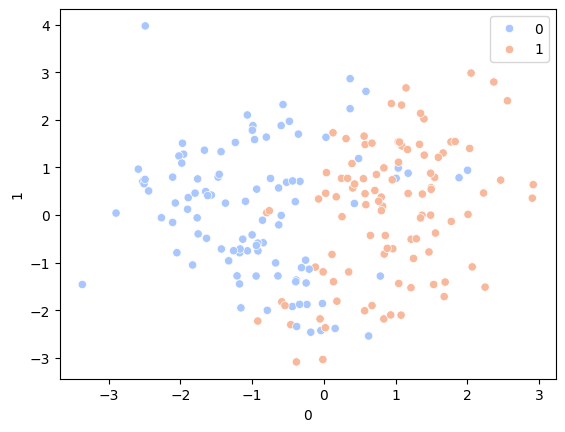

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
data = make_classification(n_classes=2, n_features=2, n_clusters_per_class=2, n_samples=200, random_state=42, n_informative=2, n_redundant=0, n_repeated=0)
#data = make_classification(n_classes=3, n_features=2, n_clusters_per_class=1, n_samples=100, random_state=42, n_informative=2, n_redundant=0, n_repeated=0)
df = pd.DataFrame(data[0])
df
y= data[1]
sns.scatterplot(x=0,y=1,hue=y,palette='coolwarm', data=df)

In [2]:
from sklearn.model_selection import train_test_split
x_train,  x_test,y_train, y_test = train_test_split(np.array(df),y,test_size=0.4,random_state=2)
k = 7#Hyper Parameter

In [3]:
dis = np.array(list(map(lambda x:np.sqrt(np.sum((x-x_train)**2,axis=1)),x_test)))
dis = dis.argsort()
dis = dis[:,:k]
dis

array([[ 17,  13,  11,  36,  35,  80,  12],
       [ 87,  34,  51,  37,  81,   1,  45],
       [102,  32,  42,  48,  85,   0,  10],
       [ 22,  10, 115,  93, 102,  86,  32],
       [ 99,  62,  15,  77,  43,  29,  49],
       [115,  22,  67,  54,  64,  10,  30],
       [ 15,  99,  77,  62,  29,  80,  43],
       [ 92,  26, 100,  24,  86,  83,  60],
       [ 81,   5,  43,  51,  34,  62,  87],
       [109,  31,  59, 108,  21,  74,  95],
       [ 92, 100,  57,  60,  24,  26,  20],
       [ 82,  49,  29,  77,  98,  88,  80],
       [ 22, 115,  10,  93, 112,  86, 102],
       [114, 107,  24,  26,  83,  20, 111],
       [ 51,  34,  87,   1,  81,   5,  37],
       [ 89, 116,  48,   4, 103,  85,  42],
       [ 97,  47, 103,  14,   4,  70,   3],
       [ 20,  24, 114,  26,  92,  69, 107],
       [ 58, 119,  89,  72,  63,  52, 103],
       [ 74,  95,  23,  44,  50,  21,  79],
       [ 38,  35,  12,  18,  79,  36,   9],
       [ 84,  78,  52,  63, 117,  15,  72],
       [ 57, 100,  60, 106,  92,

In [4]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [5]:
from scipy import stats
y_pred = np.array(list(map(lambda x:stats.mode(np.array(list(map(lambda l:y_train[l],x))))[0],dis)))
y_pred


array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))

Accuracy: 91.25%
Precision: 0.88
Recall: 0.95
F1 Score: 0.91
Confusion Matrix:
[[36  5]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.88      0.95      0.91        39

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
Knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Use uniform or distance-based weighting
    'p': [1, 2]  # Distance metric: p=1 is Manhattan, p=2 is Euclidean
}

Knn = GridSearchCV(Knn,cv=5, param_grid=param_grid,n_jobs=-1)
Knn.fit(x_train.reshape(-1,2),y_train)
print("Best param: ",Knn.best_params_)
y_pred2 = Knn.best_estimator_.predict(x_test.reshape(-1,2))
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred2)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred2))


Best param:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy: 91.25%
Precision: 0.88
Recall: 0.95
F1 Score: 0.91
Confusion Matrix:
[[36  5]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.88      0.95      0.91        39

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



<Axes: >

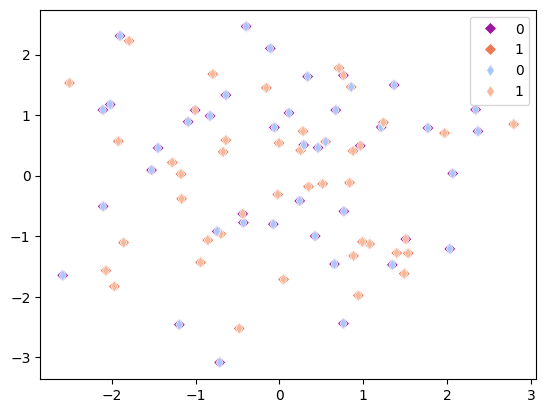

In [8]:
x_test = x_test.reshape(2,-1)
sns.scatterplot(x=x_test[0],y=x_test[1],hue=y_test,palette='plasma', marker='D')
sns.scatterplot(x=x_test[0],y=x_test[1],hue=y_pred,palette='coolwarm', marker='d')